In [24]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [25]:
data = pd.read_csv('1.01. Simple linear regression.csv')
data.head

<bound method NDFrame.head of      SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]>

In [26]:
x = data['SAT']
y = data['GPA']

In [27]:
x.shape

(84,)

In [28]:
y.shape

(84,)

In [29]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [30]:
reg = LinearRegression()
reg.fit(x_matrix, y)

LinearRegression()

In [31]:
reg.score(x_matrix, y)

0.40600391479679765

In [32]:
reg.coef_

array([0.00165569])

In [33]:
reg.intercept_

0.27504029966028076

In [37]:
new_data = pd.DataFrame(data = [1740,1760], columns = ['SAT'])
new_data

,SAT
0,1740
1,1760


In [38]:
reg.predict(new_data)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.18905127])

In [39]:
new_data['Predicted Data'] = reg.predict(new_data)
new_data

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Predicted Data
0,1740,3.155938
1,1760,3.189051


AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

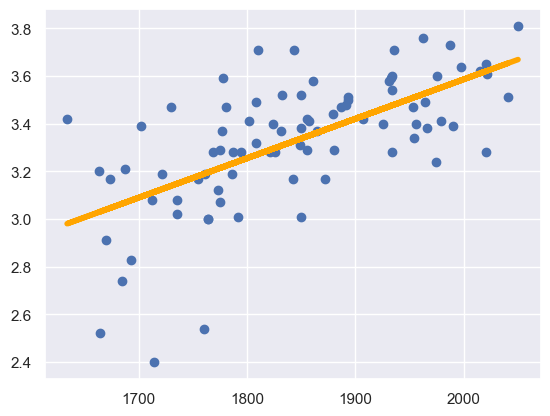

In [41]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x,yhat,lw=4,c='orange',label='regression line')
plt.x_label('SAT', fontsize = 20)
plt.y_label('GPA', fontsize = 20)
plt.show()

In [42]:
data = pd.read_csv('1.02. Multiple linear regression.csv')
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [43]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [44]:
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']

In [45]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [47]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [48]:
reg.intercept_

0.29603261264909486

In [50]:
reg.score(x,y)

0.4066811952814282

In [52]:
x.shape

(84, 2)

In [53]:
r2 = reg.score(x,y)
n=x.shape[0]
p=x.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134

In [54]:
##Feature Selection

In [55]:
from sklearn.feature_selection import f_regression

In [56]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [57]:
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [59]:
p_values.round(3)

array([0.   , 0.676])

In [61]:
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [63]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)

In [64]:
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


In [65]:
##Standardization

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
scaler.fit(x)

StandardScaler()

In [69]:
x_scaled = scaler.transform(x)

In [70]:
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

In [71]:
reg = LinearRegression()
reg.fit(x_scaled, y)

LinearRegression()

In [72]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [73]:
reg.intercept_

3.330238095238095

In [79]:
reg_summary = pd.DataFrame([['Bias'], ['SAT'], ['Rand 1,2,3']], columns=['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [80]:
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


In [83]:
new_data = pd.DataFrame(data = [[1700,2], [1800,1]], columns=['SAT', 'Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [84]:
reg.predict(new_data)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([295.39979563, 312.58821497])

In [85]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [86]:
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

In [89]:
reg_simple = LinearRegression()
x_simple_matrix = x_scaled[:,0].reshape(-1,1)
reg_simple.fit(x_simple_matrix, y)

LinearRegression()

In [90]:
reg_simple.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.08970998, 3.25527879])